# _h_-means

Heuristic clustering inspired by [_k_-means](https://en.wikipedia.org/wiki/K-means_clustering). As another demonstration of how continuous heuristics can be used.

### Set up IPython notebook environment first...

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external librarires
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Objective function demonstration

In [21]:
from objfun_hmeans import HMeans

In [22]:
of = HMeans()  

In [23]:
print('f* = {}'.format(of.fstar))

f* = 0.3084489218103048


<IPython.core.display.Javascript object>


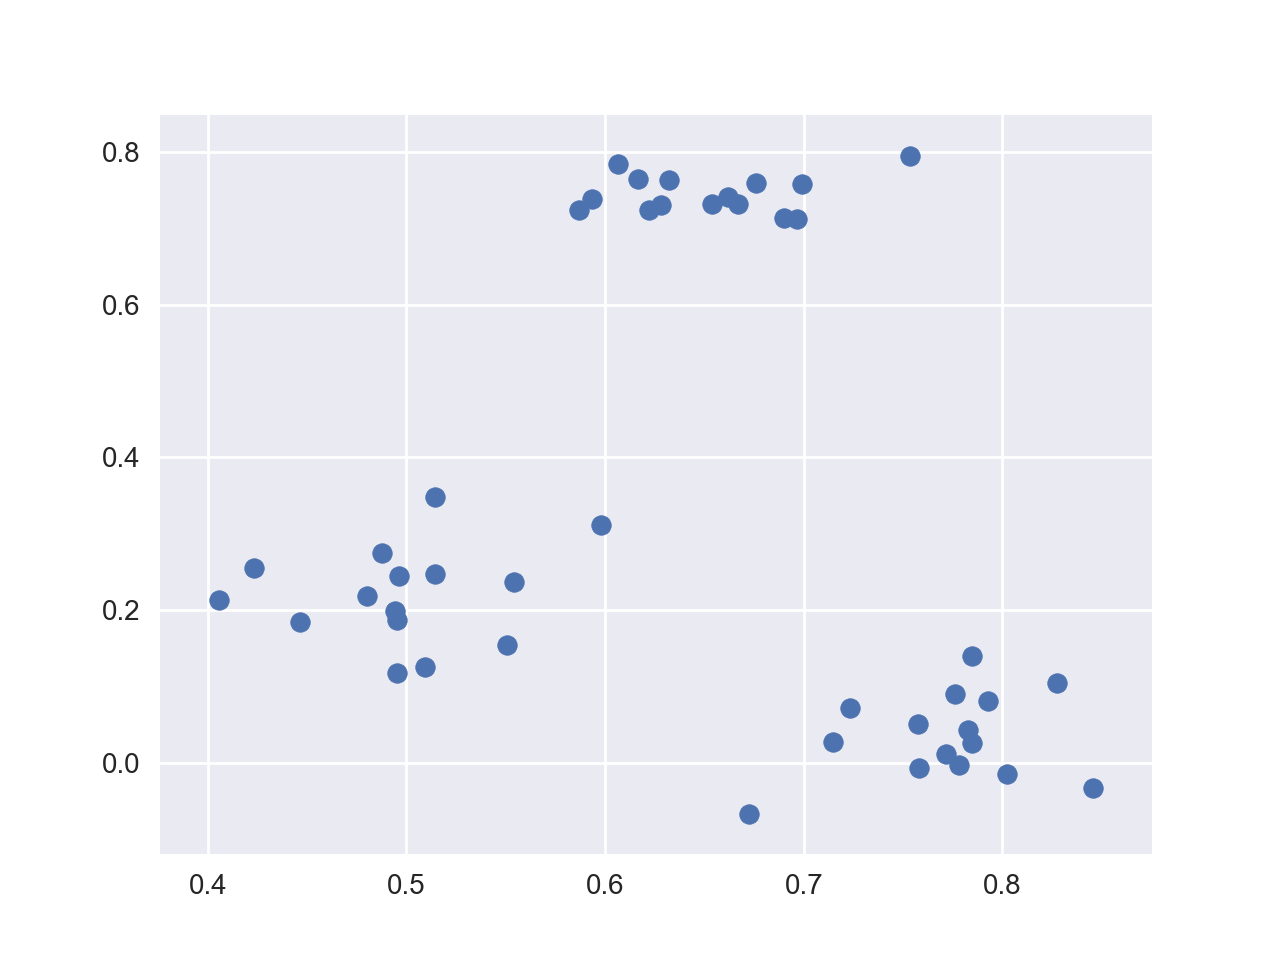

In [16]:
# plot the data proints
X = of.X
ax = plt.scatter(x=X[:, 0], y=X[:, 1])

In [24]:
print('a = {}'.format(of.a))
print('b = {}'.format(of.b))

a = [ 0.40569774 -0.06641667  0.40569774 -0.06641667  0.40569774 -0.06641667]
b = [ 0.84554749  0.79467683  0.84554749  0.79467683  0.84554749  0.79467683]


**Bounds are repeated for each centroid, that will be tuned by the heuristic.**

In [47]:
# some random evaluations
for i in range(10):
    x = of.generate_point()
    print('f({}) = {}'.format(x, of.evaluate(x)))

f([ 0.58965248  0.97279757  0.25699268  0.91670833  0.60418252  0.57948149]) = 7.591023351739391
f([ 0.0923206   0.67903912  0.63970854  0.62650751  0.65927322  0.63780127]) = 8.647796585681313
f([ 0.31241352  0.13018861  0.29188636  0.27442366  0.16821545  0.06149673]) = 9.316836841595114
f([ 0.14619523  0.12860874  0.91351149  0.3590429   0.46702553  0.76888061]) = 4.389729602297844
f([ 0.63840367  0.66377304  0.77655707  0.11008545  0.07972731  0.51239388]) = 1.7281436925323244
f([ 0.96374605  0.57578584  0.76534958  0.19249529  0.02796384  0.21755995]) = 3.5446759075536884
f([ 0.77270676  0.17673096  0.37730406  0.93761792  0.9690857   0.95922921]) = 3.2195236296861514
f([ 0.47100697  0.70448549  0.42656322  0.17137569  0.61101829  0.30683941]) = 2.2091449054339423
f([ 0.77135829  0.45627085  0.98737758  0.75810195  0.06853145  0.7387025 ]) = 6.200684340464445
f([ 0.03657332  0.91726172  0.00969402  0.03686427  0.06204282  0.45868833]) = 18.553644406555854


In [48]:
# we can get cluster labels (for a random solution)
labels = of.get_cluster_labels(x)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2
 1 2 2 1 2 1 2 1]


In [49]:
# auxiliary routine
def visualize_solution(x, of):
    labels = of.get_cluster_labels(x)
    X = of.X
    ax = plt.scatter(x=X[:, 0], y=X[:, 1], c=labels)

<IPython.core.display.Javascript object>


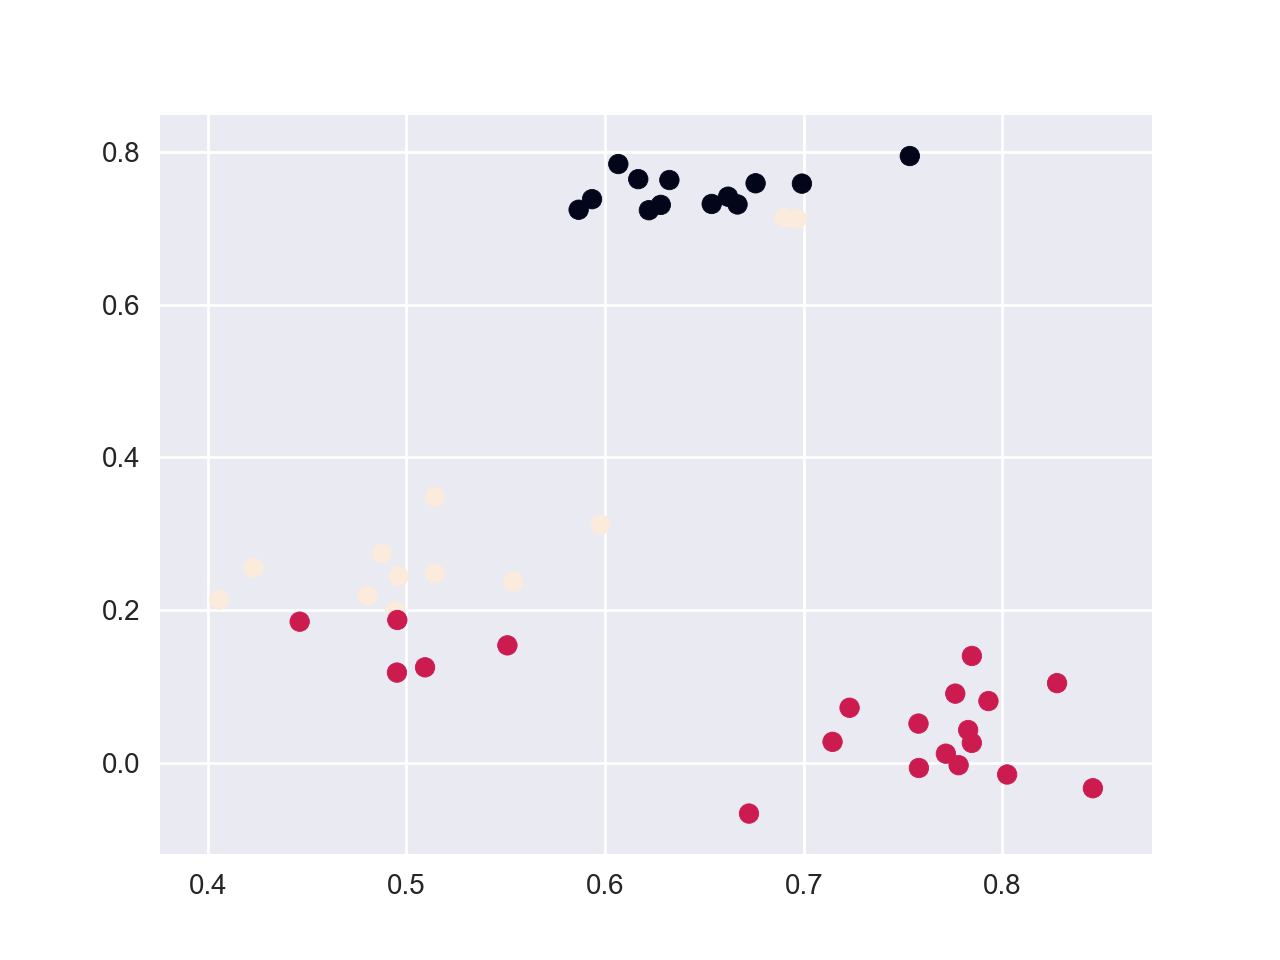

In [50]:
# visualization of a random solution
visualize_solution(x, of)

In [76]:
# some random evaluations (new way)

for i in range(10):
    x = of.generate_point_new()
    print('f({}) = {}'.format(x, of.evaluate(x)))


f([ 0.69480519  0.11098338  0.58581803  0.58691656  0.83189392  0.48847672]) = 1.5535241788025103
f([ 0.51596464  0.68772685  0.76552864  0.46468325  0.56399206  0.39403957]) = 3.5838804170295155
f([ 0.40641406  0.02908711  0.55256944  0.7933455   0.59195435  0.54835346]) = 2.934364385590713
f([ 0.56091265  0.09382952  0.68465115  0.03274494  0.68181004  0.06362777]) = 7.08528997939669
f([ 0.72115772  0.55696625  0.56063087 -0.0303419   0.48060319 -0.04339685]) = 2.4118643103801807
f([ 0.78338498  0.72079249  0.74874476  0.25317912  0.70238286  0.4274988 ]) = 2.1256776489849303
f([ 0.46624163  0.74716781  0.42104097  0.03455903  0.63843251  0.19962172]) = 1.637933790877588
f([ 0.77961043  0.63595819  0.46489783  0.07374984  0.42271071  0.6873342 ]) = 2.3571556935402405
f([ 0.63278561  0.32252695  0.57298087  0.148253    0.75083773  0.41519931]) = 2.869142731800571
f([ 0.51155535  0.15145834  0.41864242  0.36259938  0.55593586  0.40898905]) = 3.2575570139586585


In [62]:
# we can get cluster labels (for a random solution)
labels = of.get_cluster_labels(x)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2]


In [63]:
# auxiliary routine
def visualize_solution(x, of):
    labels = of.get_cluster_labels(x)
    X = of.X
    ax = plt.scatter(x=X[:, 0], y=X[:, 1], c=labels)

<IPython.core.display.Javascript object>


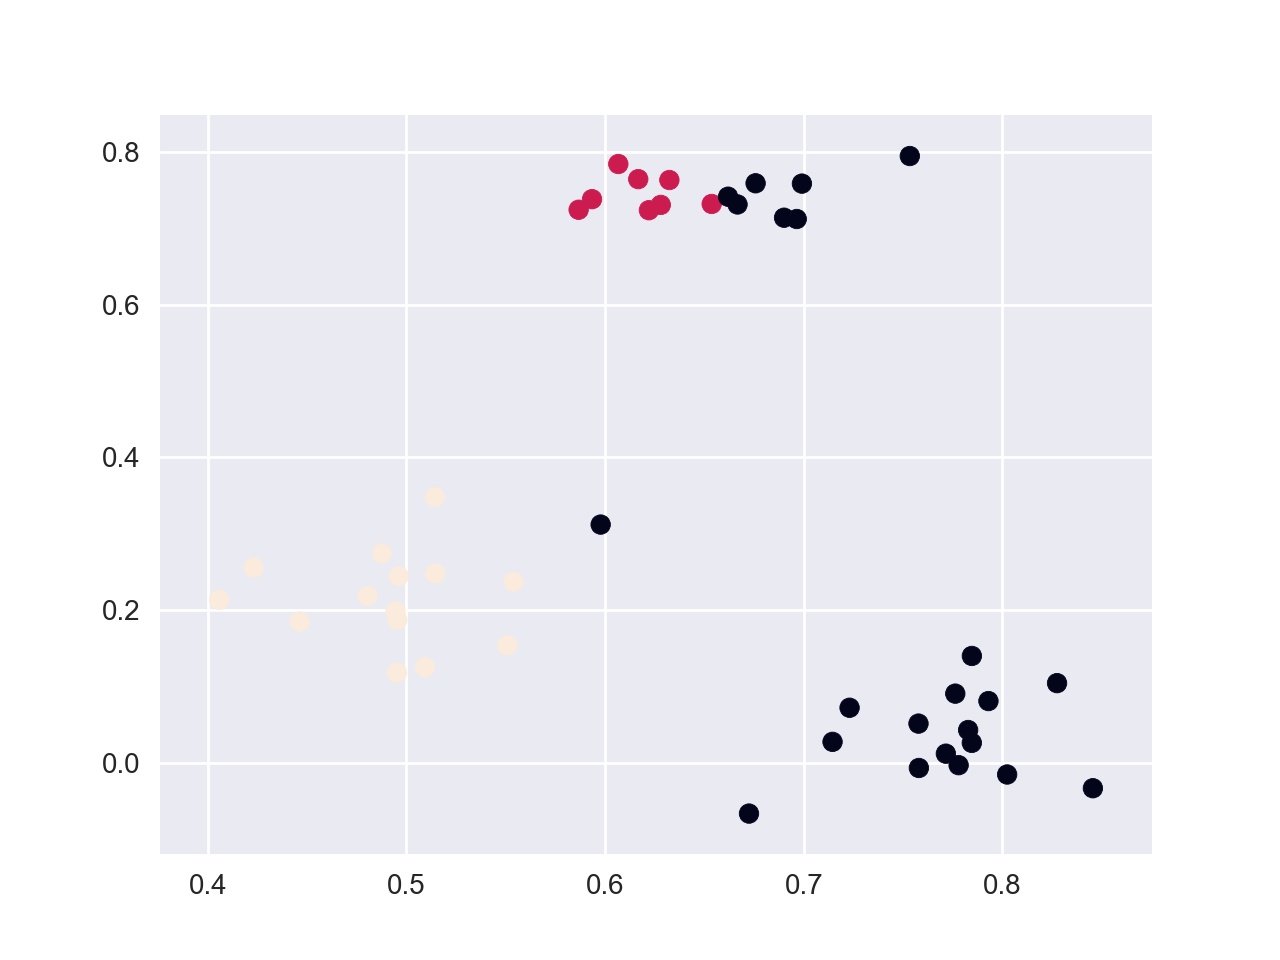

In [64]:
# visualization of a random solution
visualize_solution(x, of)

# Srovnání

In [82]:
# some random evaluations (new way)
countbetter = 0
for j in range(20):
    ybest_old=[]
    for i in range(10):
        x = of.generate_point()
        ybest_old.append(of.evaluate(x))

    ybest_new=[]
    for i in range(10):
        x = of.generate_point_new()
        ybest_new.append(of.evaluate(x))
    
    best_old = min(ybest_old)
    best_new = min(ybest_new)
    
    if best_new < best_old: 
        isbetter = True
        countbetter = countbetter + 1
    else:
        isbetter =  False 
    print('f (best old way) = {}, f (best new way) = {}, is better : {}'.format(best_old, best_new,isbetter))
print('nová metoda je lepší v {} případech z {}'.format(countbetter, 20))

f (best old way) = 3.1069331736404964, f (best new way) = 1.7949612647669322, is better : True
f (best old way) = 2.2462409240538417, f (best new way) = 0.7985157261525717, is better : True
f (best old way) = 3.0950049119681076, f (best new way) = 0.6116125604668561, is better : True
f (best old way) = 1.9054817376825848, f (best new way) = 0.6049931028809364, is better : True
f (best old way) = 1.4555854164324966, f (best new way) = 0.5679008052468609, is better : True
f (best old way) = 2.665288168589629, f (best new way) = 1.2447904409834967, is better : True
f (best old way) = 2.513769338785077, f (best new way) = 0.8060099979905068, is better : True
f (best old way) = 2.7889576548019437, f (best new way) = 1.3859248773363382, is better : True
f (best old way) = 1.7501360055657653, f (best new way) = 1.4088579143726647, is better : True
f (best old way) = 3.7295018320188915, f (best new way) = 1.5164153207595152, is better : True
f (best old way) = 2.0346194661839987, f (best new w